# Data Quality Analysis - Drilldown Solutions

This notebook provides a comprehensive analysis of the Drilldown Solutions dataset, focusing on:
- Missing values analysis
- Data quality assessment
- Data distribution insights
- Data consistency checks
- Recommendations for data cleaning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Load and Examine Data


In [2]:
# Load all datasets
companies = pd.read_csv('../dbt/data/companies.csv')
contacts = pd.read_csv('../dbt/data/contacts.csv')
deals = pd.read_csv('../dbt/data/deals.csv')
invoices = pd.read_csv('../dbt/data/invoices.csv')
invoice_lines = pd.read_csv('../dbt/data/invoice_lines.csv')
products = pd.read_csv('../dbt/data/products.csv')

print("Dataset shapes:")
print(f"Companies: {companies.shape}")
print(f"Contacts: {contacts.shape}")
print(f"Deals: {deals.shape}")
print(f"Invoices: {invoices.shape}")
print(f"Invoice Lines: {invoice_lines.shape}")
print(f"Products: {products.shape}")


Dataset shapes:
Companies: (100, 8)
Contacts: (100, 8)
Deals: (94, 8)
Invoices: (67, 8)
Invoice Lines: (134, 8)
Products: (8, 5)


## 2. Missing Values Analysis



MISSING VALUES ANALYSIS: COMPANIES

Dataset shape: (100, 8)
Total cells: 800

✅ No missing values found!

Empty String Analysis:

MISSING VALUES ANALYSIS: CONTACTS

Dataset shape: (100, 8)
Total cells: 800

✅ No missing values found!

Empty String Analysis:

MISSING VALUES ANALYSIS: DEALS

Dataset shape: (94, 8)
Total cells: 752

✅ No missing values found!

Empty String Analysis:

MISSING VALUES ANALYSIS: INVOICES

Dataset shape: (67, 8)
Total cells: 536

Missing Values by Column:
   Column  Missing_Count  Missing_Percentage
paid_date             13           19.402985


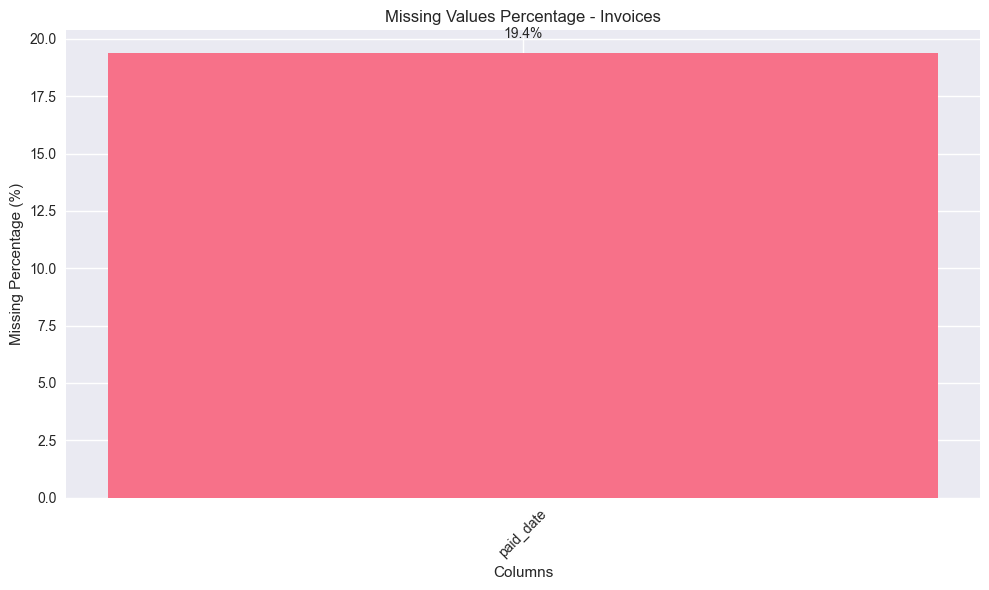


Empty String Analysis:

MISSING VALUES ANALYSIS: INVOICE LINES

Dataset shape: (134, 8)
Total cells: 1072

Missing Values by Column:
    Column  Missing_Count  Missing_Percentage
Unnamed: 6            132           98.507463
Unnamed: 7            132           98.507463
line_total              1            0.746269


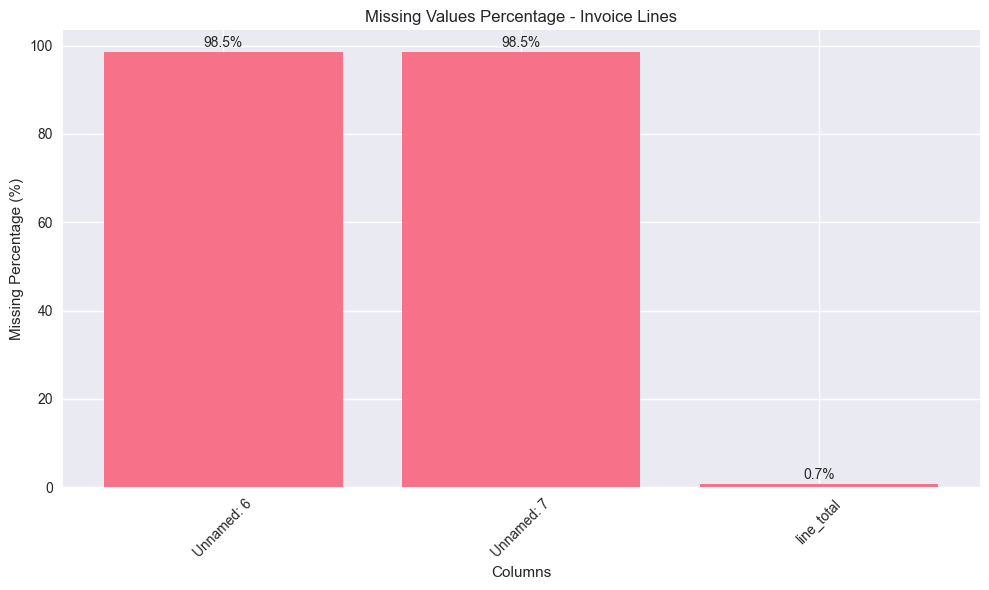


Empty String Analysis:

MISSING VALUES ANALYSIS: PRODUCTS

Dataset shape: (8, 5)
Total cells: 40

✅ No missing values found!

Empty String Analysis:


In [4]:
def analyze_missing_values(df, dataset_name):
    """
    Comprehensive missing values analysis for a dataset
    """
    print(f"\n{'='*50}")
    print(f"MISSING VALUES ANALYSIS: {dataset_name.upper()}")
    print(f"{'='*50}")
    
    # Basic info
    print(f"\nDataset shape: {df.shape}")
    print(f"Total cells: {df.shape[0] * df.shape[1]}")
    
    # Missing values summary
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Percentage': missing_percent.values
    })
    
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    if len(missing_df) > 0:
        print("\nMissing Values by Column:")
        print(missing_df.to_string(index=False))
        
        # Visualize missing values
        plt.figure(figsize=(10, 6))
        bars = plt.bar(missing_df['Column'], missing_df['Missing_Percentage'])
        plt.title(f'Missing Values Percentage - {dataset_name}')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage (%)')
        plt.xticks(rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    else:
        print("\n✅ No missing values found!")
    
    # Check for empty strings or whitespace
    print("\nEmpty String Analysis:")
    for col in df.columns:
        if df[col].dtype == 'object':
            empty_strings = (df[col].astype(str).str.strip() == '').sum()
            if empty_strings > 0:
                print(f"  {col}: {empty_strings} empty strings ({(empty_strings/len(df)*100):.1f}%)")
    
    return missing_df

# Analyze missing values for all datasets
datasets = {
    'Companies': companies,
    'Contacts': contacts,
    'Deals': deals,
    'Invoices': invoices,
    'Invoice Lines': invoice_lines,
    'Products': products
}

missing_summary = {}
for name, df in datasets.items():
    missing_summary[name] = analyze_missing_values(df, name)
